# Regression Project 

In [1]:
%pip install pyodbc
%pip install python-dotenv 
%pip install pandas
%pip install matplotlib
%pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pyodbc #just installed with pip
from dotenv import dotenv_values #import the dotenv_values function from the dotenv package
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import warnings

warnings.filterwarnings('ignore')

## Loading Datasets

In [3]:
environment_variables = dotenv_values('.env')
database = environment_variables.get('DATABASE')
server = environment_variables.get('SERVER')
username = environment_variables.get('USERNAME')
password =environment_variables.get('PASSWORD')

connection_string=f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [4]:
connection=pyodbc.connect(connection_string)

In [5]:
query='select * from dbo.oil'
data=pd.read_sql(query,connection)


In [6]:
query='select * from dbo.stores'
data1=pd.read_sql(query,connection)


In [7]:
query='select * from dbo.holidays_events'
data2=pd.read_sql(query,connection)


In [8]:
transaction= pd.read_csv(r'C:\Users\HomePC\Desktop\Data\transactions.csv')

In [9]:
train= pd.read_csv(r'C:\Users\HomePC\Desktop\Data\train.csv')

In [10]:
test=pd.read_csv(r'C:\Users\HomePC\Desktop\Data\test.csv')

In [11]:
sample_submission=pd.read_csv(r'C:\Users\HomePC\Desktop\Data\sample_submission.csv')

## Data Understanding

#### DBO Dataset Analysis 

In [12]:
data.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.139999
2,2013-01-03,92.970001
3,2013-01-04,93.120003
4,2013-01-07,93.199997


In [13]:
data.shape

(1218, 2)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


In [15]:
data.isna().sum()

date           0
dcoilwtico    43
dtype: int64

In [16]:
data1.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [17]:
data1.shape

(54, 5)

In [18]:
data1.isna().sum()

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

In [19]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [20]:
data2.head(20)

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
5,2012-05-12,Holiday,Local,Puyo,Cantonizacion del Puyo,False
6,2012-06-23,Holiday,Local,Guaranda,Cantonizacion de Guaranda,False
7,2012-06-25,Holiday,Regional,Imbabura,Provincializacion de Imbabura,False
8,2012-06-25,Holiday,Local,Latacunga,Cantonizacion de Latacunga,False
9,2012-06-25,Holiday,Local,Machala,Fundacion de Machala,False


In [21]:
data2.shape

(350, 6)

In [22]:
data2.isna().sum()

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

In [23]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


#### Sample Submission Analysis

In [24]:
sample_submission.head(20)

,id,sales
0,3000888,0.0
1,3000889,0.0
2,3000890,0.0
3,3000891,0.0
4,3000892,0.0
5,3000893,0.0
6,3000894,0.0
7,3000895,0.0
8,3000896,0.0
9,3000897,0.0


In [25]:
sample_submission.tail(20)

,id,sales
28492,3029380,0.0
28493,3029381,0.0
28494,3029382,0.0
28495,3029383,0.0
28496,3029384,0.0
28497,3029385,0.0
28498,3029386,0.0
28499,3029387,0.0
28500,3029388,0.0
28501,3029389,0.0


In [26]:
sample_submission.shape

(28512, 2)

In [27]:
sample_submission.isna().sum()

id       0
sales    0
dtype: int64

#### Train Dataset Analysis

In [28]:
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [29]:
train.shape

(3000888, 6)

In [30]:
train.isna().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [31]:
train.value_counts()

id       date        store_nbr  family                   sales    onpromotion
0        2013-01-01  1          AUTOMOTIVE               0.000    0              1
2000584  2016-01-31  41         PERSONAL CARE            452.000  0              1
2000586  2016-01-31  41         PLAYERS AND ELECTRONICS  5.000    0              1
2000587  2016-01-31  41         POULTRY                  237.271  0              1
2000588  2016-01-31  41         PREPARED FOODS           105.349  0              1
                                                                                ..
1000298  2014-07-17  26         BEAUTY                   2.000    0              1
1000299  2014-07-17  26         BEVERAGES                667.000  2              1
1000300  2014-07-17  26         BOOKS                    0.000    0              1
1000301  2014-07-17  26         BREAD/BAKERY             166.641  2              1
3000887  2017-08-15  9          SEAFOOD                  16.000   0              1
Name: cou

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


#### Test Data Analysis

In [33]:
test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [34]:
test.shape

(28512, 5)

In [35]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [36]:
test.isna().sum()

id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64

#### Transaction Dataset Analysis

In [37]:
transaction.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [38]:
transaction.shape

(83488, 3)

In [39]:
transaction.isna().sum()

date            0
store_nbr       0
transactions    0
dtype: int64

In [40]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


### Hypothesis 


Hypothesis: The sales of products in a specific store are influenced by factors such as the type of product family and whether the product is on promotion.

Effect of Product Family on Sales:

Null Hypothesis (H0): The type of product family has no significant impact on sales.
Alternative Hypothesis (H1): The type of product family significantly affects sales.
Effect of Promotion on Sales:

Null Hypothesis (H0): Promotion status (onpromotion) has no significant impact on sales.
Alternative Hypothesis (H1): Promotion status (onpromotion) significantly affects sales.
Combined Effect of Product Family and Promotion on Sales:

Null Hypothesis (H0): The combination of product family and promotion status has no significant impact on sales.
Alternative Hypothesis (H1): The combination of product family and promotion status significantly affects sales.
Effect of Store Number on Sales:

Null Hypothesis (H0): Store number has no significant impact on sales.
Alternative Hypothesis (H1): Store number significantly affects sales.


## Exploratory Data Analysis(EDA)

## Issues with the data and how we plan to handle them.
1. Missing Values: We will check for missing values in the dataset and decide how to handle them. If there are only a few missing values, we may choose to drop those rows. If a significant number of records have missing values, we can consider imputation techniques like mean, median, or mode.

2. Data Types: We will ensure that the data types of each column are appropriate for the analysis. Categorical variables should be encoded as numeric values, and continuous variables should remain as numeric.

3. Class Imbalance: We need to check for class imbalance in the target variable (Churn). If there is a severe class imbalance, we may need to address it using techniques such as oversampling, undersampling, or using appropriate evaluation metrics.

4. Feature Scaling: Some machine learning algorithms may require feature scaling to ensure that all features contribute equally to the model. We will scale the numerical features if necessary.

5. Handling Categorical Variables: We will use one-hot encoding to convert categorical variables into a binary form suitable for model training.

6. Data Splitting: Before model training, we will split the data into training and testing sets to evaluate the model's performance on unseen data.

By addressing these issues during data preprocessing, we can ensure that our dataset is ready for model building and analysis.

## Visualization

In [41]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


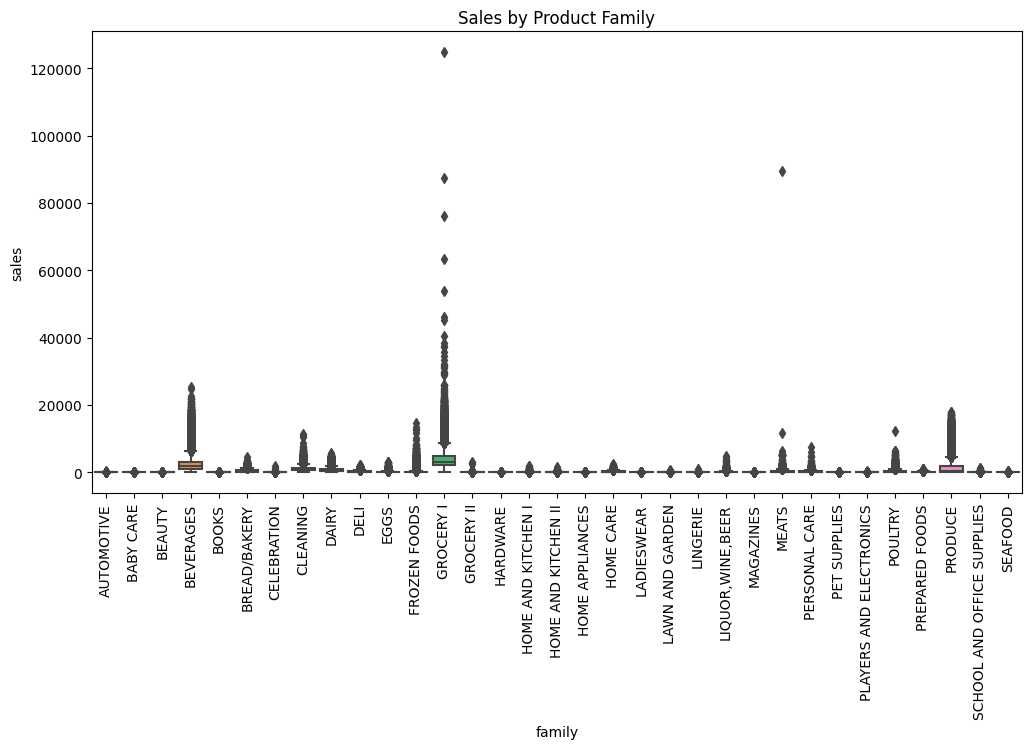

In [42]:
#distribution of sales of different families
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=train, x='family', y='sales')
plt.xticks(rotation=90)
plt.title('Sales by Product Family')
plt.show()


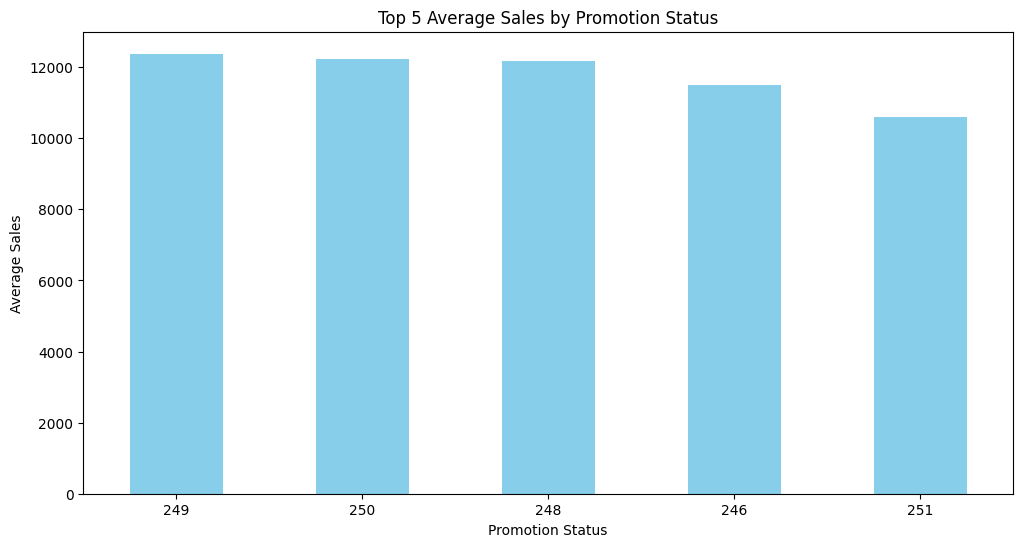

In [43]:
#top 5 average sales and the promotion done the sales
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average sales by promotion status
promotion_sales = train.groupby('onpromotion')['sales'].mean().sort_values(ascending=False)

# Select the top 5
top_5_promotion_sales = promotion_sales.head(5)

# Create the bar chart
plt.figure(figsize=(12, 6))
top_5_promotion_sales.plot(kind='bar', color='skyblue')
plt.xlabel('Promotion Status')
plt.ylabel('Average Sales')
plt.title('Top 5 Average Sales by Promotion Status')
plt.xticks(rotation=0)
plt.show()



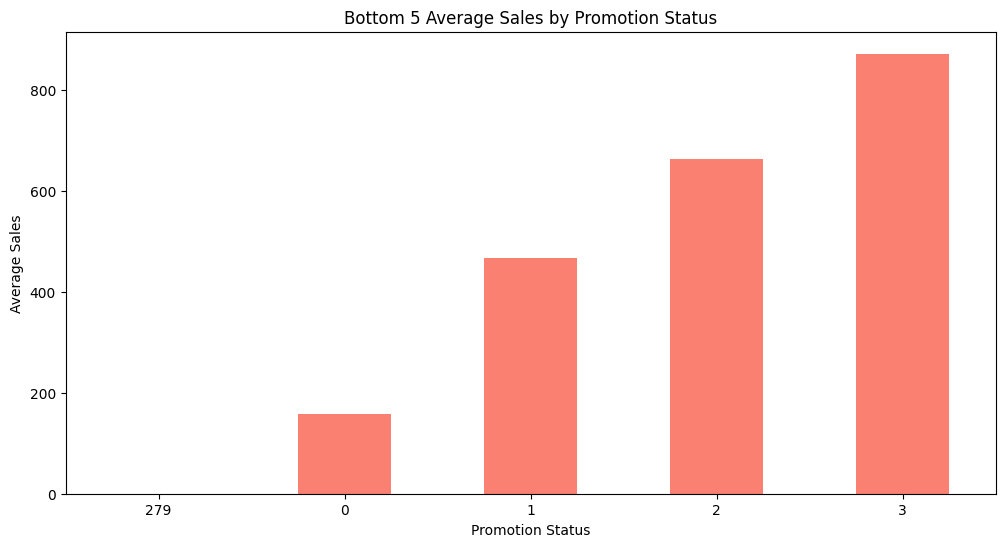

In [44]:
#bottom 5 average sales and the promotion done on the sales
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average sales by promotion status
promotion_sales = train.groupby('onpromotion')['sales'].mean().sort_values()

# Select the bottom 5
bottom_5_promotion_sales = promotion_sales.head(5)

# Create the bar chart
plt.figure(figsize=(12, 6))
bottom_5_promotion_sales.plot(kind='bar', color='salmon')
plt.xlabel('Promotion Status')
plt.ylabel('Average Sales')
plt.title('Bottom 5 Average Sales by Promotion Status')
plt.xticks(rotation=0)
plt.show()


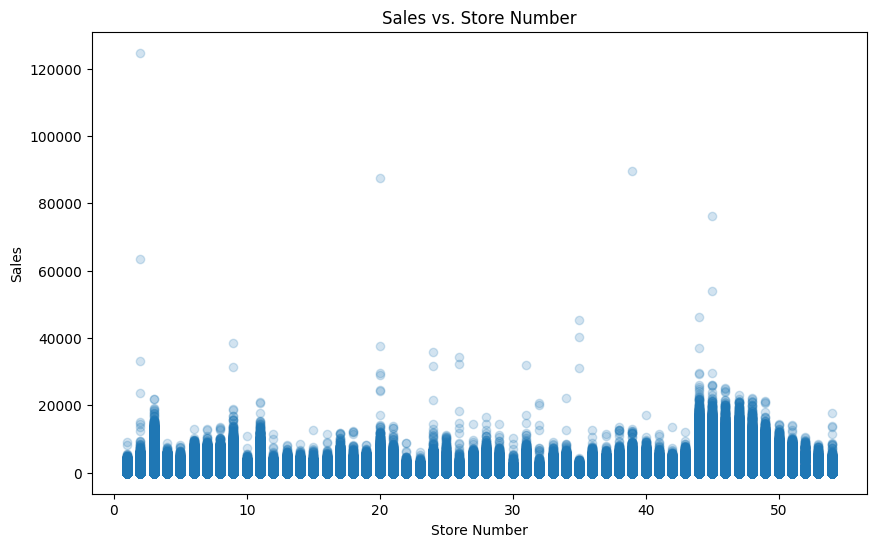

In [45]:
#scatterplot of the sales and the store number 
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(train['store_nbr'], train['sales'], alpha=0.2)
plt.xlabel('Store Number')
plt.ylabel('Sales')
plt.title('Sales vs. Store Number')
plt.show()


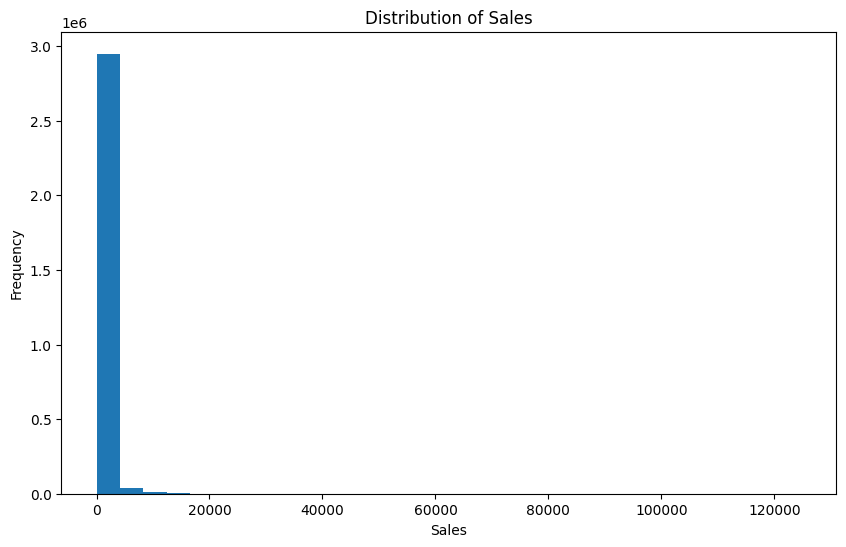

In [46]:
#distribution of sales 
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(train['sales'], bins=30)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales')
plt.show()


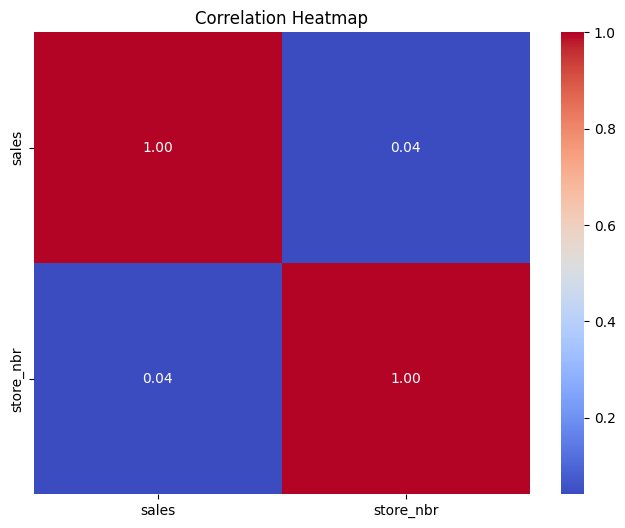

In [47]:
#Correlation between the sales and the store number
import seaborn as sns

corr_matrix = train[['sales', 'store_nbr']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


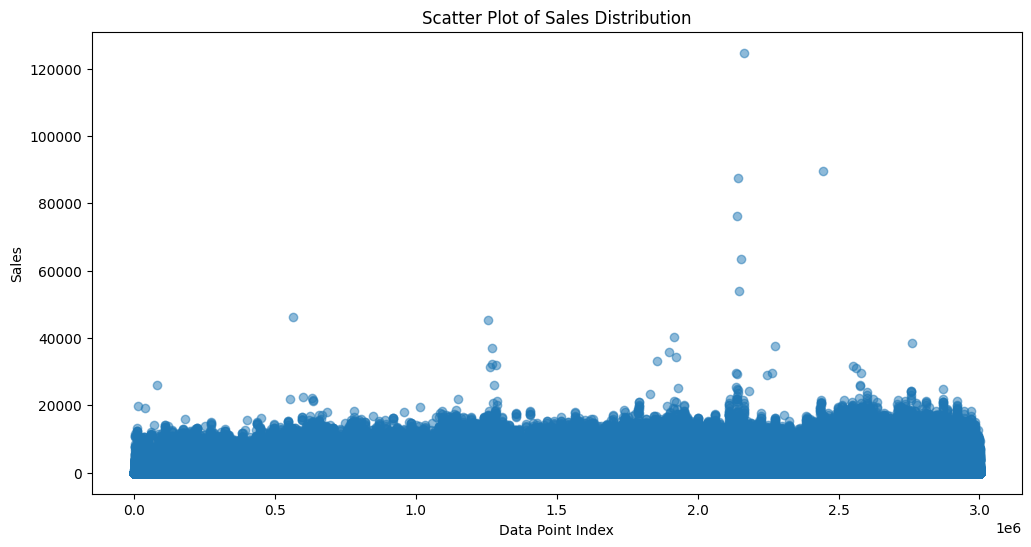

In [48]:
import matplotlib.pyplot as plt
# Create a scatter plot for the distribution of sales
plt.figure(figsize=(12, 6))
plt.scatter(range(len(train)), train['sales'], alpha=0.5)
plt.title('Scatter Plot of Sales Distribution')
plt.xlabel('Data Point Index')
plt.ylabel('Sales')
plt.show()


#### Merge Train and Test Dataset

In [49]:
merged_data = pd.concat([train, test], axis=0)

In [50]:
merged_data.head(20)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0
5,5,2013-01-01,1,BREAD/BAKERY,0.0,0
6,6,2013-01-01,1,CELEBRATION,0.0,0
7,7,2013-01-01,1,CLEANING,0.0,0
8,8,2013-01-01,1,DAIRY,0.0,0
9,9,2013-01-01,1,DELI,0.0,0


In [51]:
merged_data.shape

(3029400, 6)

In [52]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3029400 entries, 0 to 28511
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 161.8+ MB


In [53]:
merged_data['date'] = pd.to_datetime(merged_data['date'])


In [54]:
# One Hot Encoding 
merged_data = pd.get_dummies(merged_data, columns=['family'], prefix='family', drop_first=True)


In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
merged_data[['sales', 'store_nbr']] = scaler.fit_transform(merged_data[['sales', 'store_nbr']])


In [56]:
merged_data.tail(20)

,id,date,store_nbr,sales,onpromotion,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_BREAD/BAKERY,...,family_MAGAZINES,family_MEATS,family_PERSONAL CARE,family_PET SUPPLIES,family_PLAYERS AND ELECTRONICS,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD
28492,3029380,2017-08-31,-1.186979,NaN,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
28493,3029381,2017-08-31,-1.186979,NaN,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
28494,3029382,2017-08-31,-1.186979,NaN,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
28495,3029383,2017-08-31,-1.186979,NaN,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
28496,3029384,2017-08-31,-1.186979,NaN,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
28497,3029385,2017-08-31,-1.186979,NaN,7,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
28498,3029386,2017-08-31,-1.186979,NaN,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
28499,3029387,2017-08-31,-1.186979,NaN,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
28500,3029388,2017-08-31,-1.186979,NaN,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
28501,3029389,2017-08-31,-1.186979,NaN,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [57]:
merged_data.isna().sum()

id                                       0
date                                     0
store_nbr                                0
sales                                28512
onpromotion                              0
family_BABY CARE                         0
family_BEAUTY                            0
family_BEVERAGES                         0
family_BOOKS                             0
family_BREAD/BAKERY                      0
family_CELEBRATION                       0
family_CLEANING                          0
family_DAIRY                             0
family_DELI                              0
family_EGGS                              0
family_FROZEN FOODS                      0
family_GROCERY I                         0
family_GROCERY II                        0
family_HARDWARE                          0
family_HOME AND KITCHEN I                0
family_HOME AND KITCHEN II               0
family_HOME APPLIANCES                   0
family_HOME CARE                         0
family_LADI

In [58]:
# Assuming you have a DataFrame named 'merged_data' and you want to fill null values in the 'sales' column with the mode
mode_sales = merged_data['sales'].mode()[0]  # Calculate the mode of the 'sales' column

# Fill the null values in the 'sales' column with the mode
merged_data['sales'].fillna(mode_sales, inplace=True)


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [60]:
X = merged_data[['store_nbr']]
y = merged_data['sales']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### CREATE AND Train the Linear Regression Model

In [62]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [63]:
y_pred = model.predict(X_test)


In [65]:
#Evaluation of the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


Mean Squared Error (MSE): 0.9987921320421713
R-squared (R²): 0.0018280529633249998


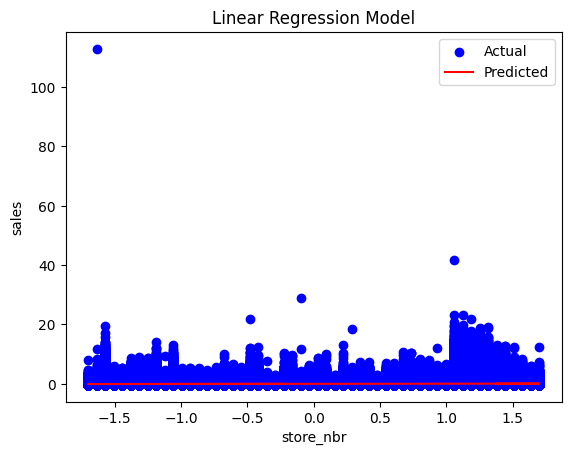

In [66]:
#Visualization of the model
plt.scatter(X_test, y_test, color='b', label='Actual')
plt.plot(X_test, y_pred, color='r', label='Predicted')
plt.xlabel('store_nbr')
plt.ylabel('sales')
plt.legend()
plt.title('Linear Regression Model')
plt.show()


In [69]:
#Create Logistics Regression 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
alpha = 1.0  # You can adjust the value of alpha
model = Ridge(alpha=alpha)
model.fit(X_train, y_train)


Ridge()

In [70]:
y_pred = model.predict(X_test)


In [71]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


Mean Squared Error (MSE): 0.9987921321267005
R-squared (R²): 0.0018280528788483519


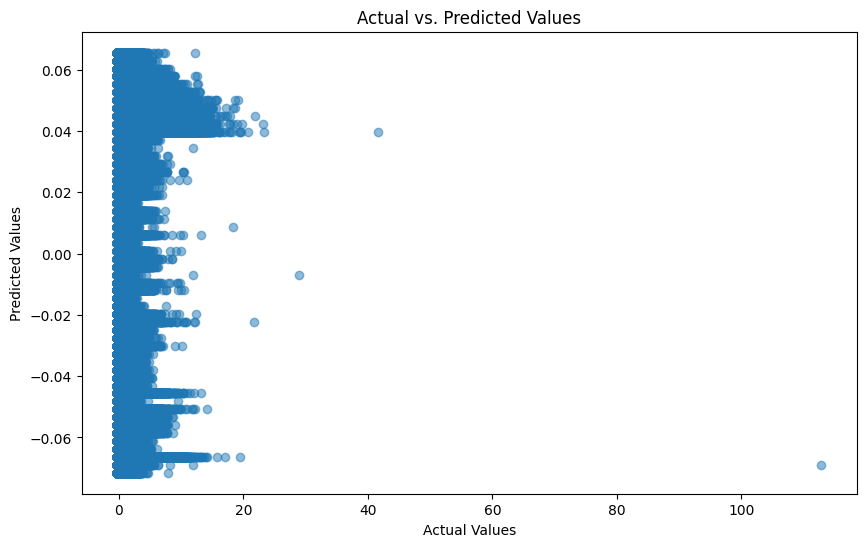

In [72]:
# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

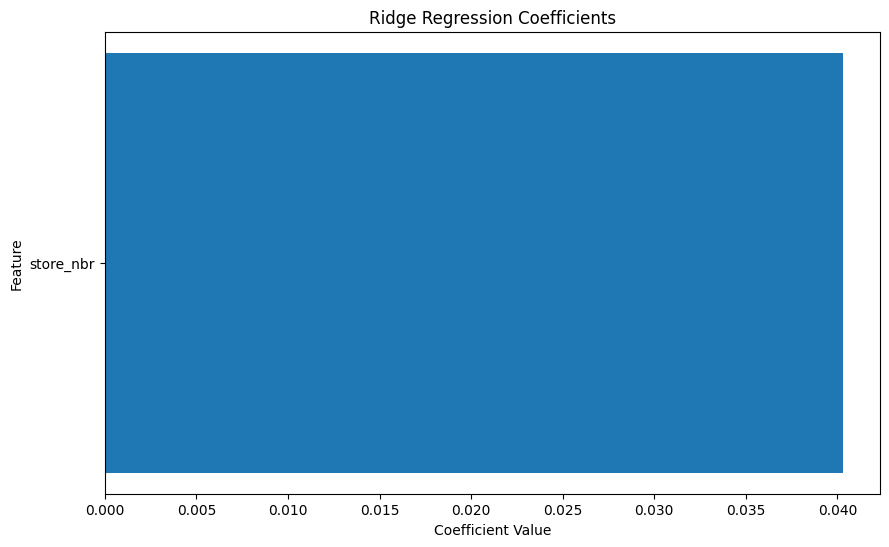

In [73]:
# Plot Ridge Regression coefficients
coefs = model.coef_
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefs)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Ridge Regression Coefficients')
plt.show()

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [75]:
alpha = 1.0  # You can adjust the value of alpha
model = Lasso(alpha=alpha)
model.fit(X_train, y_train)


Lasso()

In [76]:
y_pred = model.predict(X_test)


In [79]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


Mean Squared Error (MSE): 1.000621392183659
R-squared (R²): -7.132649293417614e-08


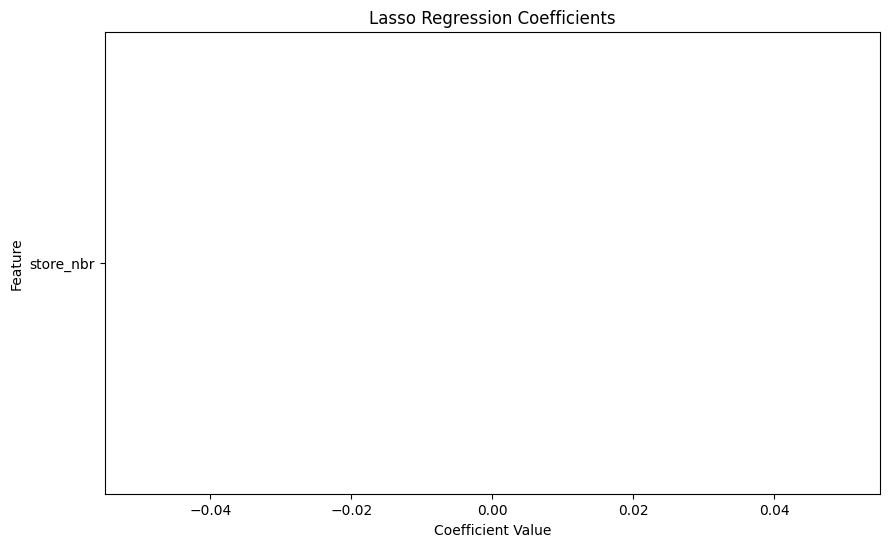

In [80]:
#visualization 
# Get the Lasso Regression coefficients
lasso_coefs = model.coef_

# Get the names of the features
feature_names = X.columns

# Plot the Lasso Regression coefficients
plt.figure(figsize=(10, 6))
plt.barh(feature_names, lasso_coefs)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Lasso Regression Coefficients')
plt.show()


#### Neural Network Regression

In [84]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Output layer with 1 neuron for regression
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size=32